In [1]:
require(foreign)
require(MASS)

Loading required package: foreign
Loading required package: MASS


In [45]:
cdata <- read.dta("https://stats.idre.ucla.edu/stat/data/crime.dta")
head(cdata)

sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single
1,ak,761,9.0,41.8,75.2,86.6,9.1,14.3
2,al,780,11.6,67.4,73.5,66.9,17.4,11.5
3,ar,593,10.2,44.7,82.9,66.3,20.0,10.7
4,az,715,8.6,84.7,88.6,78.7,15.4,12.1
5,ca,1078,13.1,96.7,79.3,76.2,18.2,12.5
6,co,567,5.8,81.8,92.5,84.4,9.9,12.1


bartlett.test() # varyansların homojen olup olmadığını test eder. İstatiskite çoğu model, verilerin normal dağılıma ve eşit varyansa sahip olduğu varsayımı yapar. shapiro-wilk test normalliği test eder. Barlett's and Levene Testler normal dağılıma sahip verilerin eşit varyansa sahip olup olmadığını araştırır. p value değeri .05 den büyük ise eşit varyansa sahip demektir.

In [36]:
shapiro.test(cdata$pctwhite)
shapiro.test(cdata$pctmetro)


	Shapiro-Wilk normality test

data:  cdata$pctwhite
W = 0.81739, p-value = 1.876e-06



	Shapiro-Wilk normality test

data:  cdata$pctmetro
W = 0.93944, p-value = 0.01167


In [85]:
# p-value > 0.05 olduğu zaman varyanslar arasında önemli bir fark yok.
var.test(cdata$single , cdata$poverty)
bartlett.test(list(cdata$crime , cdata$poverty , cdata$single))
fligner.test(list(cdata$crime , cdata$poverty , cdata$single))


	F test to compare two variances

data:  cdata$single and cdata$poverty
F = 0.11842, num df = 49, denom df = 49, p-value = 6.616e-12
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.06719976 0.20867598
sample estimates:
ratio of variances 
         0.1184186 



	Bartlett test of homogeneity of variances

data:  list(cdata$crime, cdata$poverty, cdata$single)
Bartlett's K-squared = 766.08, df = 2, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  list(cdata$crime, cdata$poverty, cdata$single)
Fligner-Killeen:med chi-squared = 106.4, df = 2, p-value < 2.2e-16


In [46]:
ols <- lm(crime ~ murder + pctmetro + pctwhite + pcths + poverty + single, cdata )

In [47]:
summary(ols) 


Call:
lm(formula = crime ~ murder + pctmetro + pctwhite + pcths + poverty + 
    single, data = cdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-327.34 -114.33   -7.81   92.14  415.20 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1143.7912   584.9993  -1.955   0.0569 .  
murder         19.3315     4.4442   4.350 7.97e-05 ***
pctmetro        6.6218     1.1185   5.920 4.42e-07 ***
pctwhite       -0.6983     2.5048  -0.279   0.7817    
pcths           4.7913     6.6781   0.717   0.4769    
poverty        15.0068     9.7222   1.544   0.1299    
single         54.8519    21.3038   2.575   0.0135 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 152.4 on 44 degrees of freedom
Multiple R-squared:  0.895,	Adjusted R-squared:  0.8807 
F-statistic: 62.51 on 6 and 44 DF,  p-value: < 2.2e-16


In [48]:
anova(ols)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
murder,1,7640198.858,7640198.858,329.1254976,4.774083e-22
pctmetro,1,752740.109,752740.109,32.4266380,9.472784e-07
pctwhite,1,6424.408,6424.408,0.2767515,6.014801e-01
pcths,1,5669.088,5669.088,0.2442137,6.236374e-01
poverty,1,148151.746,148151.746,6.3821005,1.520059e-02
single,1,153890.638,153890.638,6.6293213,1.347185e-02
Residuals,44,1021399.898,23213.634,NA,NA


In [49]:
ols1 <- rlm(crime ~ murder + pctmetro, cdata, psi = psi.bisquare)

In [50]:
summary(ols1)


Call: rlm(formula = crime ~ murder + pctmetro, data = cdata, psi = psi.bisquare)
Residuals:
    Min      1Q  Median      3Q     Max 
-274.89 -103.42   16.36   87.14  449.20 

Coefficients:
            Value    Std. Error t value 
(Intercept) -75.3501  76.7854    -0.9813
murder       32.5750   2.3386    13.9291
pctmetro      5.8305   1.1415     5.1077

Residual standard error: 144.5 on 48 degrees of freedom

In [51]:
anova(ols1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
murder,1,7000914.3,7000914.3,NA,NA
pctmetro,1,667164.7,667164.7,NA,NA
Residuals,NA,1341844.2,NA,NA,NA


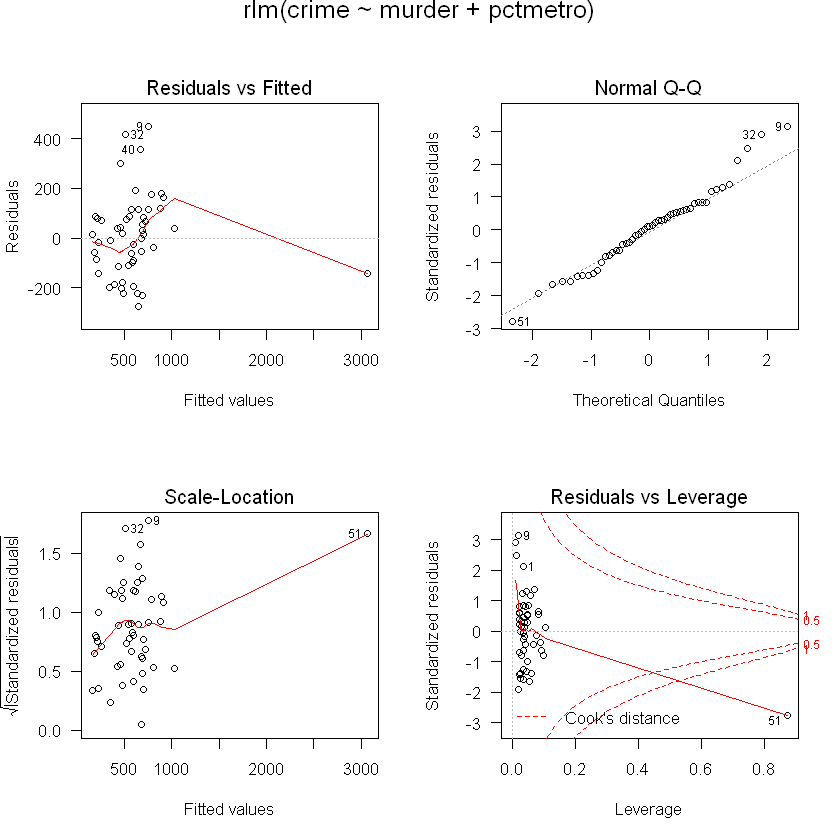

In [52]:
opar <- par(mfrow = c(2,2), oma=c(0,0,1.1,0)) # grafikleri 2ye 2 lik matrix şeklinde gösterdi. oma is lm(crime....) başlığını yazdı
plot(ols1, las=1)

In [53]:
d1 <- cooks.distance(ols)
r <- stdres(ols1) # the standardized residuals
a <- cbind(cdata, d1, r)
a[d1 > 4/51, ]

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single,d1,r
1,1,ak,761,9.0,41.8,75.2,86.6,9.1,14.3,0.1210560,NA
9,9,fl,1206,8.9,93.0,83.5,74.4,17.8,10.6,0.1799365,NA
11,11,hi,261,3.8,74.7,40.9,80.1,8.0,9.1,0.8867658,NA
25,25,ms,434,13.5,30.7,63.3,64.3,24.7,14.7,0.4856362,NA
51,51,dc,2922,78.5,100.0,31.8,73.1,26.4,22.1,5.1542267,NA


In [62]:
cdata = cdata[1:50 , ]

In [63]:
ols2 <- rlm(crime ~ murder + pctmetro, cdata, psi = psi.bisquare)
summary(ols2)


Call: rlm(formula = crime ~ murder + pctmetro, data = cdata, psi = psi.bisquare)
Residuals:
    Min      1Q  Median      3Q     Max 
-281.58  -91.19   11.98   79.37  449.66 

Coefficients:
            Value     Std. Error t value  
(Intercept) -121.6463   70.8474    -1.7170
murder        49.3282    5.6252     8.7692
pctmetro       4.7200    1.0339     4.5651

Residual standard error: 133 on 47 degrees of freedom

In [64]:
anova(ols2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
murder,1,2446114.9,2446114.9,NA,NA
pctmetro,1,396112.8,396112.8,NA,NA
Residuals,NA,1137948.1,NA,NA,NA
